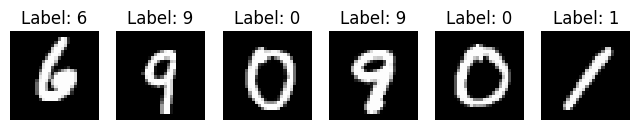

Epoch 1/5, Loss: 241.3623
Epoch 2/5, Loss: 105.9155
Epoch 3/5, Loss: 74.6515
Epoch 4/5, Loss: 54.7525
Epoch 5/5, Loss: 44.5810


In [9]:
# Simple MNIST classifier demo using PyTorch
# Achieves ~97.6% test accuracy on CPU


import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)

test_dataset = datasets.MNIST(
    root="./data", train=False, transform=transform
)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=64, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=64, shuffle=False
)

examples = iter(train_loader)
images, labels = next(examples)

plt.figure(figsize=(8, 3))
for i in range(6):
    plt.subplot(1, 6, i + 1)
    plt.imshow(images[i][0], cmap="gray")
    plt.title(f"Label: {labels[i].item()}")
    plt.axis("off")
plt.show()

class DigitNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)   # Flatten image
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


model = DigitNet()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


epochs = 5

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss:.4f}")


Test Accuracy: 97.60%


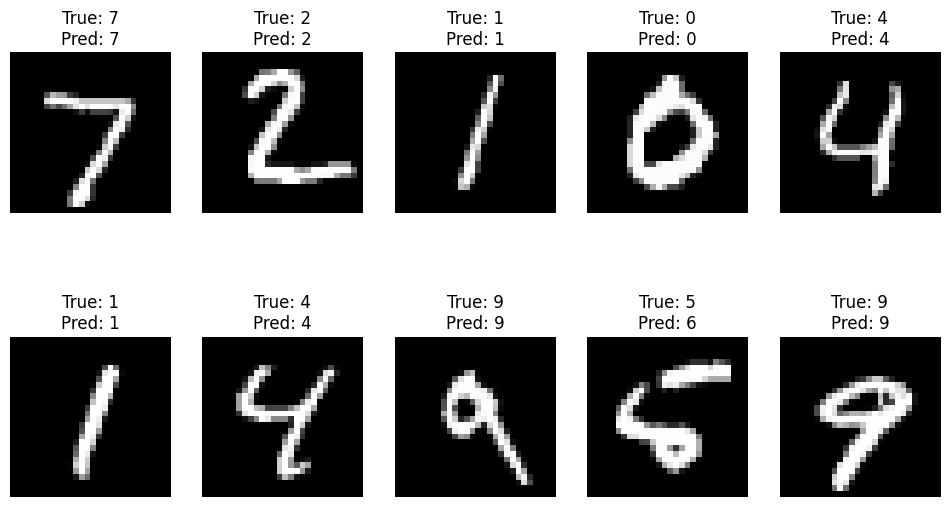

In [11]:
# --- Evaluate on test set ---
model.eval()  # switch to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # no need to track gradients
    for data, target in test_loader:
        output = model(data)
        _, predicted = torch.max(output, 1)  # predicted class is the one with max logit
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# --- Visualise some test predictions with more vertical gap ---
examples = iter(test_loader)
images, labels = next(examples)
output = model(images)
_, predicted = torch.max(output, 1)

plt.figure(figsize=(12, 6))  # wider and taller figure
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i][0], cmap='gray')
    plt.title(f"True: {labels[i].item()}\nPred: {predicted[i].item()}", fontsize=12)
    plt.axis('off')

plt.subplots_adjust(hspace=0.6)  # increase vertical gap between rows
plt.show()
